<a href="https://colab.research.google.com/github/AnnweshaAdhikari/Restaurant-Review-Sentiment-Analysis/blob/main/Restaurant_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset from https://github.com/DataThinkers/Datasets/blob/main/DS/Restaurant_Reviews.tsv

In [ ]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
print(dataset.shape)
dataset.head()

(1000, 2)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset['character_count'] = dataset['Review'].apply(len)
dataset.head()

,Review,Liked,count,sentence_count,character_count
0,Wow... Loved this place.,1,24,2,24
1,Crust is not good.,0,18,1,18
2,Not tasty and the texture was just nasty.,0,41,1,41
3,Stopped by during the late May bank holiday of...,1,87,1,87
4,The selection on the menu was great and so wer...,1,59,1,59


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset['sentence_count'] = dataset['Review'].apply(lambda x: len(nltk.sent_tokenize(x)))
dataset.head()

,Review,Liked,count,sentence_count,character_count
0,Wow... Loved this place.,1,24,2,24
1,Crust is not good.,0,18,1,18
2,Not tasty and the texture was just nasty.,0,41,1,41
3,Stopped by during the late May bank holiday of...,1,87,1,87
4,The selection on the menu was great and so wer...,1,59,1,59


In [ ]:
print(dataset[dataset['Liked']==1]['character_count'].mean())
print(dataset[dataset['Liked']==0]['character_count'].mean())

55.88
60.75


## Stop word removal

In [ ]:
import re
review_re = re.sub('[^a-zA-Z]', ' ', dataset['Review'][1])
review_re

'Crust is not good '

In [ ]:
review_re = review_re.lower()
review_re = review_re.split()
review_re

['crust', 'is', 'not', 'good']

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
list_stopwords = stopwords.words('english')
list_stopwords.remove('not')
list_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
review_re = [word for word in review_re if word not in set(list_stopwords)]
review_re

['crust', 'not', 'good']

## Stemming using PorterStemmer

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review_re = [ps.stem(word) for word in review_re]
review_re = ' '.join(review_re)
review_re

'crust not good'

In [ ]:
custom_stopwords = {'no','not','aren','don',"don't",
 "aren't",
'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"}

ps = PorterStemmer()
list_stopwords = set(stopwords.words('english'))-custom_stopwords
list_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'she',
 "she's",
 'should',
 "should've",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'un

In [ ]:
new_corpus = []

for i in range(len(dataset)):
  review_new = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review_new = review_new.lower()
  review_new = review_new.split()
  review_new = [ps.stem(word) for word in review_new if word not in list_stopwords]
  review_new = ' '.join(review_new)
  new_corpus.append(review_new)
new_corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didn tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier no care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock no sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like

In [ ]:
dataset['Processed_Review'] = new_corpus
dataset

,Review,Liked,count,sentence_count,character_count,Processed_Review
0,Wow... Loved this place.,1,24,2,24,wow love place
1,Crust is not good.,0,18,1,18,crust not good
2,Not tasty and the texture was just nasty.,0,41,1,41,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,1,87,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,1,59,select menu great price
...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,1,66,think food flavor textur lack
996,Appetite instantly gone.,0,24,1,24,appetit instantli gone
997,Overall I was not impressed and would not go b...,0,50,1,50,overal not impress would not go back
998,"The whole experience was underwhelming, and I ...",0,91,1,91,whole experi underwhelm think go ninja sushi n...


## Visualizing the most common words

<Figure size 1000x600 with 0 Axes>

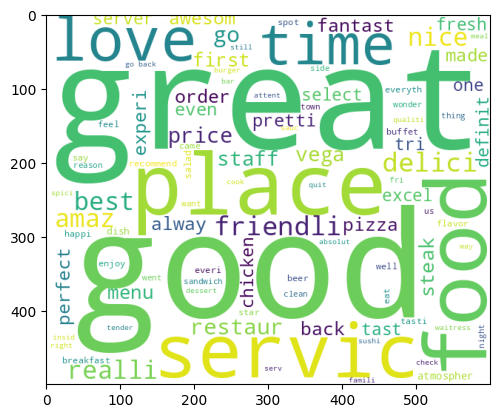

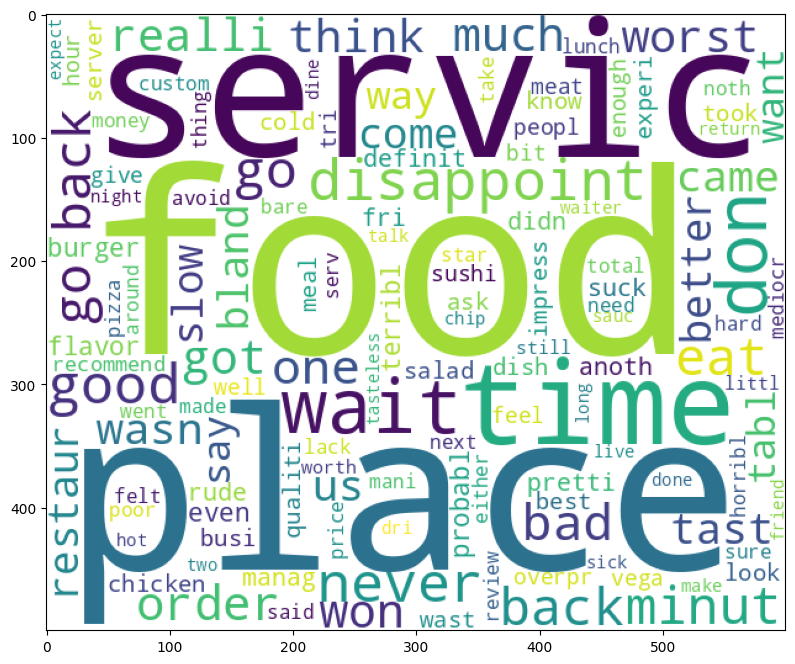

<Figure size 1000x600 with 0 Axes>

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=500, min_font_size=10,background_color='white')
positive = wc.generate(dataset[dataset['Liked']==1]['Processed_Review'].str.cat(sep=' '))
plt.imshow(positive)
plt.figure(figsize=(10,8))

negative = wc.generate(dataset[dataset['Liked']==0]['Processed_Review'].str.cat(sep=' '))
plt.imshow(negative)
plt.figure(figsize=(10,6))

## Bag-of-words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1580)
var_X = cv.fit_transform(new_corpus).toarray()
print(var_X.shape)
var_X

(1000, 1580)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
var_Y = dataset['Liked']
var_Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

## Training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(var_X, var_Y, test_size=0.4, random_state=0)

## Label prediction using Naive-Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred = nb.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7025

## Label prediction using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.815

## Label prediction using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.81

In [ ]:
import joblib
joblib.dump(logreg, 'Restaurant_Review_LogisticRegression')
joblib.dump(rf, 'Restaurant_Review_RandomForest')

['Restaurant_Review_RandomForest']